**Assignment 5 - CNN model with Data augmentation and Transfer Learning**

**Author - Snehal Utage**

**ZID - Z1888637**

In [1]:
#DOWNLOAD SAMPLES
#Download Cats and Dogs Data Samples

#Import the required packages
import tensorflow as tf
from tensorflow import keras
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_hub as hub
from keras.layers.normalization import BatchNormalization
from collections import defaultdict
from tensorflow.keras.preprocessing import image_dataset_from_directory

_URL = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
path_to_zip = tf.keras.utils.get_file("cats_and_dogs.zip", origin = _URL, extract = True)
PATH = os.path.join(os.path.dirname(path_to_zip), "cats_and_dogs_filtered")
train_dir = os.path.join(PATH,"train")
validation_dir = os.path.join(PATH,"validation")

68608000/68606236 [==============================] - 1s 0us/step


In [ ]:
#DATA EVALUATION

#Check the data 
for items in os.walk(PATH):
  print(items)

#Extract the respective directory paths
#Get the respective directories
cats_train_dir = os.path.join(train_dir, 'cats')  # cat pictures - training dir
dogs_train_dir = os.path.join(train_dir, 'dogs')  # dog pictures - training dir
cats_validation_dir = os.path.join(validation_dir, 'cats')  # cat pictures  - validation dir
dogs_validation_dir = os.path.join(validation_dir, 'dogs')  # dog pictures - validation dir

#Summary of training and testing datasets

#Get the count of data samples for each class
num_cats_training = len(os.listdir(cats_train_dir))
num_dogs_training = len(os.listdir(dogs_train_dir))

num_cats_validation = len(os.listdir(cats_validation_dir))
num_dogs_validation = len(os.listdir(dogs_validation_dir))

#Total training and validation data count
total_training = num_cats_training + num_dogs_training
total_validation = num_cats_validation + num_dogs_validation

#Print dataset details
print("\nTotal training cat images : ", num_cats_training)
print("Total training dog images : ", num_dogs_training)

print("Total validation cat images : ", num_cats_validation)
print("Total validation dog images : ", num_dogs_validation)

print("\nTotal training images:", total_training)
print("Total validation images:", total_validation)


('/root/.keras/datasets/cats_and_dogs_filtered', ['validation', 'train'], ['vectorize.py'])
('/root/.keras/datasets/cats_and_dogs_filtered/validation', ['cats', 'dogs'], [])
('/root/.keras/datasets/cats_and_dogs_filtered/validation/cats', [], ['cat.2198.jpg', 'cat.2386.jpg', 'cat.2300.jpg', 'cat.2154.jpg', 'cat.2277.jpg', 'cat.2049.jpg', 'cat.2317.jpg', 'cat.2234.jpg', 'cat.2470.jpg', 'cat.2340.jpg', 'cat.2451.jpg', 'cat.2438.jpg', 'cat.2067.jpg', 'cat.2133.jpg', 'cat.2072.jpg', 'cat.2323.jpg', 'cat.2257.jpg', 'cat.2174.jpg', 'cat.2098.jpg', 'cat.2050.jpg', 'cat.2054.jpg', 'cat.2357.jpg', 'cat.2347.jpg', 'cat.2420.jpg', 'cat.2440.jpg', 'cat.2127.jpg', 'cat.2255.jpg', 'cat.2147.jpg', 'cat.2027.jpg', 'cat.2411.jpg', 'cat.2471.jpg', 'cat.2065.jpg', 'cat.2080.jpg', 'cat.2045.jpg', 'cat.2422.jpg', 'cat.2181.jpg', 'cat.2241.jpg', 'cat.2479.jpg', 'cat.2112.jpg', 'cat.2199.jpg', 'cat.2442.jpg', 'cat.2062.jpg', 'cat.2380.jpg', 'cat.2171.jpg', 'cat.2452.jpg', 'cat.2033.jpg', 'cat.2299.jpg', 'cat

In [ ]:
#Create Training and Validation Generators using the ImageDataGenerator 

#Pre-requisites before creating the model
#Hyperparameters
epochs = 50
batch_size = 128
learning_rate =0.001
img_height = 150
img_width = 150

#Set the optimizer - Adam(default LR = 0.001)
#opt = tf.keras.optimizers.SGD(lr=learning_rate, momentum=0.9)
opt = tf.keras.optimizers.Adam(lr=learning_rate)

IMG_SIZE = (img_height, img_width)

#WITHOUT DATA AUGMENTATION
print("\nImage data generator without data augmentation")
#Format the images into appropriately pre-processed floating point tensors using ImageDataGenerator
#Create the generators to rescale the image and convert to floating point tensors
#Generator for our training images
train_image_generator = ImageDataGenerator(rescale=1./255) 

#Load the images from the traininig directory, rescale and  resize the image in the required dimensions to get batches of tensors
training_data_generator_without_aug = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(img_height, img_width),
                                                           class_mode='binary')

#Generator for our validation images
validation_image_generator = ImageDataGenerator(rescale=1./255) 

#Load the images from the traininig directory, rescaleand  resize the image in the required dimensions to get batches of tensors
validation_data_generator_without_aug = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(img_height, img_width),
                                                              class_mode='binary')


#WITH DATA AUGMENTATION
print("\nImage data generator with data augmentation")
#Using ImageDataGenerator - Create image generator that - Rotate images,flip horizontally and zooms 
train_image_generator_DA = ImageDataGenerator(
        rescale=1./255,
        rotation_range=45,
        zoom_range=0.2,
        horizontal_flip=True)

# Augmentation configuration we will use for testing:
# only rescaling
validation_image_generator_DA = ImageDataGenerator(rescale=1./255)

# Create a generator that will read pictures found in
# "train_dir", and generate batches of augmented image data
training_data_generator_with_aug = train_image_generator_DA.flow_from_directory(
        train_dir,  # this is the target directory
        target_size=(img_height, img_width),  # all images will be resized to img_height*img_width
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# Similarly, for validation data 
validation_data_generator_with_aug = validation_image_generator_DA.flow_from_directory(
        validation_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='binary')


Image data generator without data augmentation
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.

Image data generator with data augmentation
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Training images

Classes :  {'cats': 0, 'dogs': 1} 



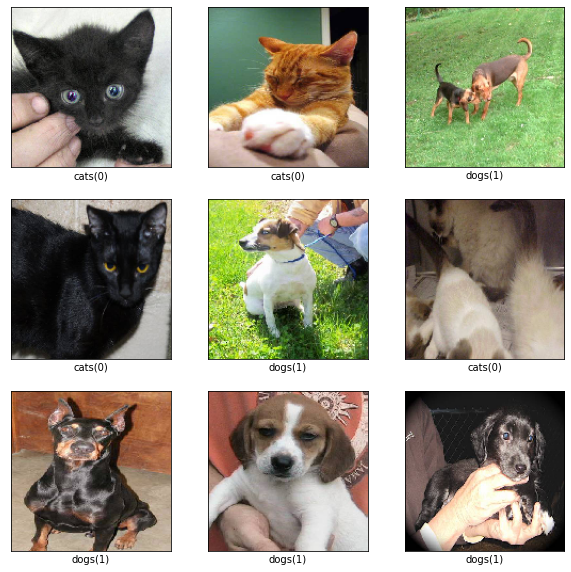

In [ ]:
#Visualize the Training Images

def visualize_images(training_data_generator):
  training_images, training_images_labels = next(training_data_generator)
  class_names = list(training_data_generator.class_indices.keys())

  print("\nClasses : ",training_data_generator.class_indices,"\n")
  plt.figure(figsize=(10,10))
  for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(training_images[i], cmap=plt.cm.binary)
    label = class_names[int(training_images_labels[i])] + "("+str(int(training_images_labels[i]))+")"
    plt.xlabel(label)
  plt.show()
  
#Visualize the training images
print("Training images")
visualize_images(training_data_generator_without_aug)

Augmented Images



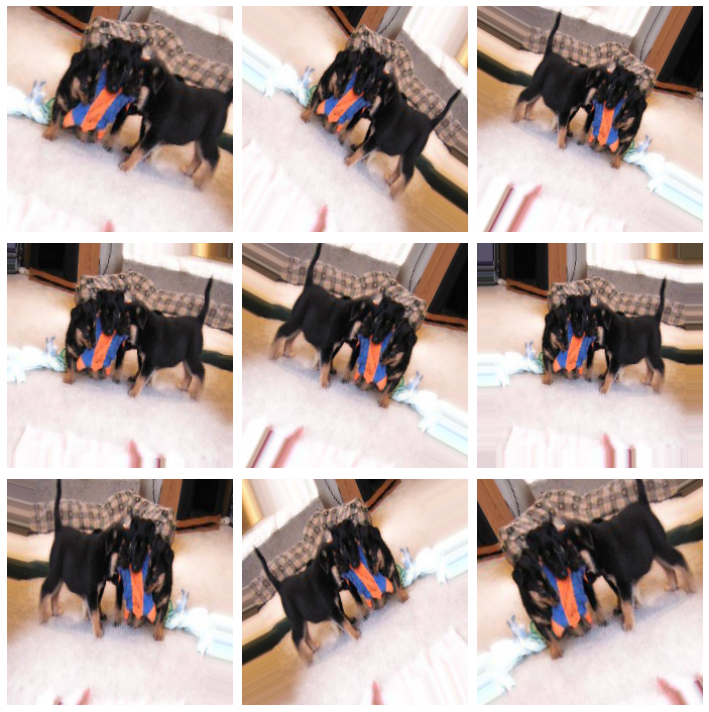

In [ ]:
#Visualize the images after data augmentation for one sample
print("Augmented Image for one sample\n")
augmented_training_images = [training_generator_DA[0][0][0] for i in range(9)]

#Visualize the augmented images
fig, axes = plt.subplots(3, 3, figsize=(10,10))
axes = axes.flatten()
for img, ax in zip(augmented_training_images, axes):
  ax.imshow(img)
  ax.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
#PLOT THE ACCURACY & LOSS GRAPHS

def plot_accuracy_loss(history):
  print("Epochs - {0}, Batch_size - {1}, Learning_Rate - {2} \n".format(epochs,batch_size,learning_rate))

  #Get the accuracy and the loss from the trained model
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  #Plot the accuracy
  plt.plot(accuracy,color='blue', label='Training accuracy')
  plt.plot(val_accuracy,color='red',label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.figure()

  #Plot the loss
  plt.plot(loss,color='blue', label='Training loss')
  plt.plot(val_loss, color='red', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()


In [ ]:
#CREATE CNN MODEL

def create_compile_model():
  model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu',input_shape=(img_height, img_width ,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, 3, padding='same',activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, 3, padding='same',activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.6),
    Dense(1, activation='sigmoid')
  ])

  #Compile the model
  model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

  #Model Summary
  model.summary()

  return model


In [ ]:
#TRAIN THE MODEL

def train_model(modelname,traingenerator,validationgenerator):
  history = modelname.fit(
      traingenerator,
      steps_per_epoch=total_training // batch_size,
      epochs=epochs,
      validation_data=validationgenerator,
      validation_steps=total_validation // batch_size
  )
  return history


Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 18, 18, 128)       0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 41472)           

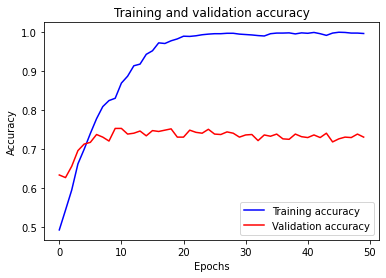

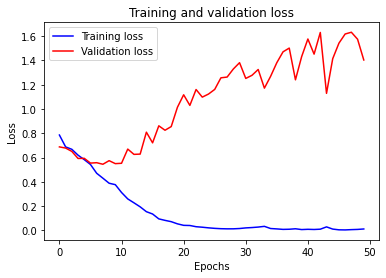

In [ ]:
#TRAIN THE MODEL WITHOUT DATA AUGMENTATION

#Create CNN model
model = create_compile_model()

#Train model with image generator with no data aumentation
history = train_model(model,training_data_generator_without_aug,validation_data_generator_without_aug)

#Plot the accuarcy and loss 
plot_accuracy_loss(history)

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_66 (Conv2D)           (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_68 (MaxPooling (None, 18, 18, 128)       0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 41472)           

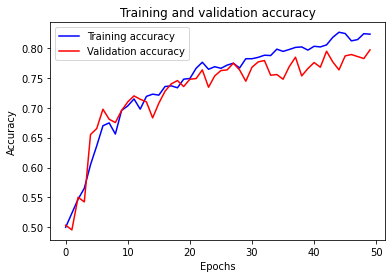

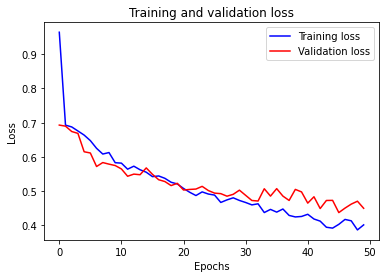

In [ ]:
#TRAIN THE MODEL WITHOUT DATA AUGMENTATION

#Create CNN model
model_DA = create_compile_model()

#Train model with image generator with no data aumentation
history_DA = train_model(model_DA,training_data_generator_with_aug,validation_data_generator_with_aug)

#Plot the accuarcy and loss 
plot_accuracy_loss(history_DA)

**Result Summary :**

**Without Data Augmentation**

- Overfitting , Large margin between the training and validation accuarcy i.e 99% training accuracy and 70-75% validation accuarcy with 50 epochs.
- The loss plot showed that it decreased for first few epochs but then it started to increase.

**With Data Augmentation**

- The overfitting is reduced by increasing the number of samples using the data augmentation.
- With the Data Augmentation we get an accuracy of 79-80%, with 50 epochs.



In [ ]:
#TRANSFER LEARNING

# Create Tranfer Learning Model 
# Get the feature extractor for the respective model from url, 
# freeze the varibales in the feature extractor layer
# Add a classifier layer - which is only trained
def createTransferLearningModel (url,image_shape,image_data):
  
  feature_extractor_url = url

  #Create Feature extractor layer
  feature_extractor_layer = hub.KerasLayer(feature_extractor_url, input_shape=(image_shape + (3,)))

  #Freeze the variables in the feature extractor layer, so that the training only modifies the new classifier layer.
  feature_extractor_layer.trainable = False

  #Attach classifier layer to the feature extractor layer and create a model
  model = tf.keras.Sequential([
    feature_extractor_layer,
    layers.Dense(image_data.num_classes, activation='softmax')
  ])

  #Model Summary
  model.summary()

  return model

In [ ]:
#Comile and Train the model

def compileTrainTLModel(modelname,opt,epochs,image_data,validation_data):
  #Compile the model
  modelname.compile(
    optimizer=opt,
    loss='categorical_crossentropy',
    metrics=['accuracy'])
  
  #Train the model 
  history = modelname.fit(image_data, epochs=epochs,
                    steps_per_epoch=10,
                    validation_data=validation_data,
                    validation_steps=10
                    )
  return history

In [ ]:
#Model Predictions - USED VALIDATION SET AS TESTING SET as no test dataset provided
#For the validation set, get the predictions from the trained model

def modelPredictions(class_names,validation_batch,modelname,validation_label_batch):
  predicted_batch = modelname.predict(validation_batch)
  predicted_id = np.argmax(predicted_batch, axis=-1)
  predicted_label_batch = class_names[predicted_id]

  label_id = np.argmax(validation_label_batch, axis=-1)

  plt.figure(figsize=(10,9))
  plt.subplots_adjust(hspace=0.5)
  for n in range(30):
    plt.subplot(6,5,n+1)
    plt.imshow(validation_batch[n])
    color = "green" if predicted_id[n] == label_id[n] else "red"
    plt.title(predicted_label_batch[n].title(), color=color)
    plot = plt.axis('off')
  _ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

In [ ]:
#Create the model with Transfer learning using TF Hub
#Pre-requisites before creating the model
#Hyperparameters
image_shape = (224,224)
epochs = 50

#Optimizer 
opt=tf.keras.optimizers.Adam()

#Data augmentation on training data- Rotate, zoom, normalize
image_generator = ImageDataGenerator(rescale=1/255)
image_data = image_generator.flow_from_directory(str(train_dir), target_size=image_shape)

#ImageDatagenerator - image_data is an iterator that returns image_batch, label_batch pairs.
#Get the image and its label
for image_batch, label_batch in image_data:
  print("Image batch shape: ", image_batch.shape)
  print("Label batch shape: ", label_batch.shape,"\n")
  break

#Create image data generator for the validation dataset, no data augmentation - only rescale(normalize)
validation_generator = ImageDataGenerator(rescale=1/255)
validation_data = validation_generator.flow_from_directory(str(validation_dir), target_size=image_shape)

#ImageDatagenerator - image_data is an iterator that returns image_batch, label_batch pairs.
#Get the image and its label
for validation_batch, validation_label_batch in validation_data:
  print("Validation Image batch shape: ", validation_batch.shape)
  print("Validation Label batch shape: ", validation_label_batch.shape)
  break

#Get the class names for the validation dataset used for prediction
class_names = sorted(validation_data.class_indices.items(), key=lambda pair:pair[1])
class_names = np.array([key.title() for key, value in class_names])
print("\nClassnames :",class_names)


Found 2000 images belonging to 2 classes.
Image batch shape:  (32, 224, 224, 3)
Label batch shape:  (32, 2) 

Found 1000 images belonging to 2 classes.
Validation Image batch shape:  (32, 224, 224, 3)
Validation Label batch shape:  (32, 2)

Classnames : ['Cats' 'Dogs']


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________
Epoch 1/50
10/10 [==============================] - 3s 263ms/step - loss: 0.3648 - accuracy: 0.8355 - val_loss: 0.2099 - val_accuracy: 0.9375
Epoch 2/50
10/10 [==============================] - 2s 218ms/step - loss: 0.1499 - accuracy: 0.9563 - val_loss: 0.1133 - val_accuracy: 0.9625
Epoch 3/50
10/10 [==============================] - 2s 222ms/step - loss: 0.1069 - accuracy: 0.9750 - val_loss: 0.0669 - val_accuracy: 0.9875
Epoch 4/50
10/10 [==============================] - 2s 217ms/step - loss: 0.

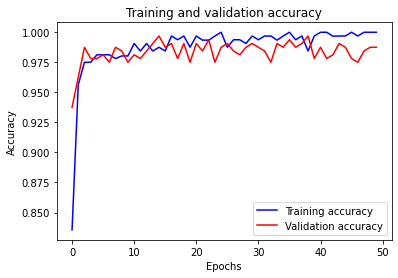

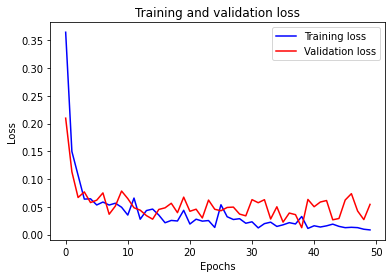


Check the predictions on the validation dataset : 


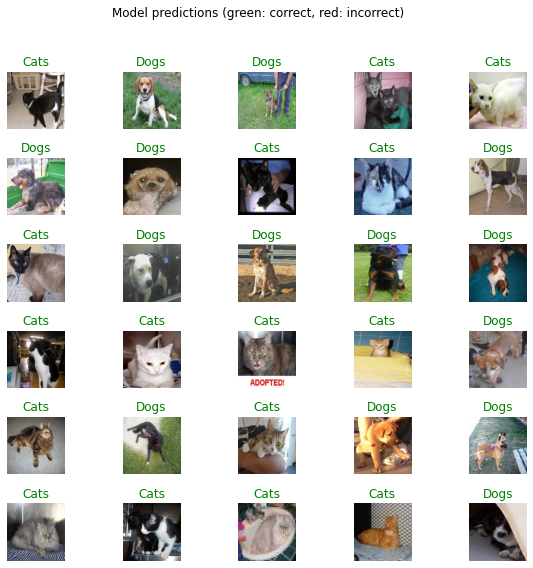

In [ ]:
#MOBILENET AS FEATURE EXTRACTOR MODEL

#MobileNet model as feature extractor and train the model
#feature extractor url for mobilenet
feature_extractor_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2" 

#create the model with features extracted from the pre-trained Mobilenet model and extra classifier layer added which is only trained
mobilenet_model = createTransferLearningModel(feature_extractor_url,image_shape,image_data)

#Compile the model generated above
mobilenet_history = compileTrainTLModel(mobilenet_model,opt,epochs,image_data,validation_data)

#Plot the loss and accuracy for the training dataset
print("\nPlot the loss and accuracy for the training dataset : ")
plot_accuracy_loss(mobilenet_history)

#Predict the validation dataset images
print("\nCheck the predictions on the validation dataset : ")
modelPredictions(class_names,validation_batch,mobilenet_model,validation_label_batch)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 2048)              23564800  
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 4098      
Total params: 23,568,898
Trainable params: 4,098
Non-trainable params: 23,564,800
_________________________________________________________________
Epoch 1/50
10/10 [==============================] - 3s 294ms/step - loss: 0.3270 - accuracy: 0.8625 - val_loss: 0.0770 - val_accuracy: 0.9750
Epoch 2/50
10/10 [==============================] - 2s 242ms/step - loss: 0.0762 - accuracy: 0.9688 - val_loss: 0.0670 - val_accuracy: 0.9844
Epoch 3/50
10/10 [==============================] - 2s 242ms/step - loss: 0.0363 - accuracy: 0.9875 - val_loss: 0.0322 - val_accuracy: 0.9969
Epoch 4/50
10/10 [==============================] - 2s 240ms/step - loss: 

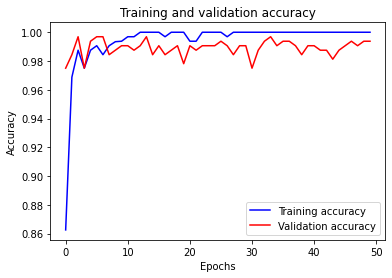

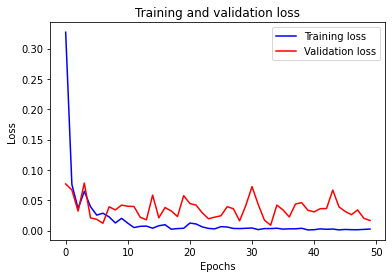


Check the predictions on the validation dataset : 


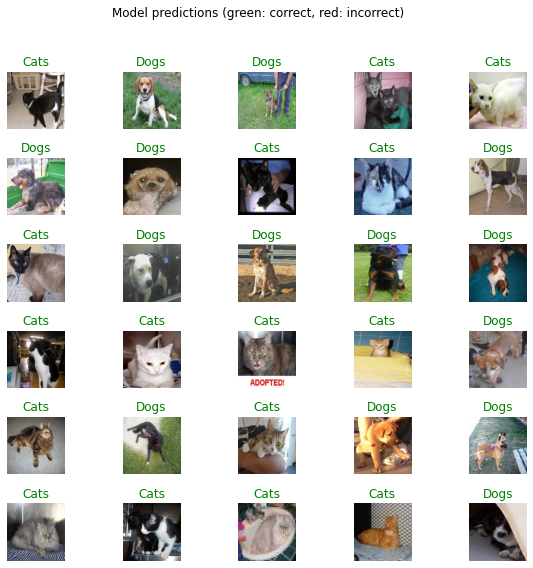

In [ ]:
#RESNET V2 50 AS FEATURE EXTRACTOR

#Resnet v2 50 model as feature extractor and train the model
#feature extractor url for Resnet v2 50
resnetv2_50_feature_extractor_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

#create the model with features extracted from the pre-trained Resnet v2 50 model and extra classifier layer added which is only trained
resnetv2_50_model = createTransferLearningModel(resnetv2_50_feature_extractor_url,image_shape,image_data)

#Compile the model generated above
resnetv2_50_history = compileTrainTLModel(resnetv2_50_model,opt,epochs,image_data,validation_data)

#Plot the loss and accuracy for the training dataset
print("\nPlot the loss and accuracy for the training dataset : ")
plot_accuracy_loss(resnetv2_50_history)

#Predict the validation dataset images
print("\nCheck the predictions on the validation dataset : ")
modelPredictions(class_names,validation_batch,resnetv2_50_model,validation_label_batch)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   (None, 2048)              42626560  
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 4098      
Total params: 42,630,658
Trainable params: 4,098
Non-trainable params: 42,626,560
_________________________________________________________________
Epoch 1/50
10/10 [==============================] - 4s 399ms/step - loss: 0.3151 - accuracy: 0.8750 - val_loss: 0.0533 - val_accuracy: 0.9875
Epoch 2/50
10/10 [==============================] - 3s 300ms/step - loss: 0.0271 - accuracy: 0.9901 - val_loss: 0.0601 - val_accuracy: 0.9750
Epoch 3/50
10/10 [==============================] - 3s 305ms/step - loss: 0.0438 - accuracy: 0.9875 - val_loss: 0.0161 - val_accuracy: 0.9906
Epoch 4/50
10/10 [==============================] - 3s 309ms/step - loss: 

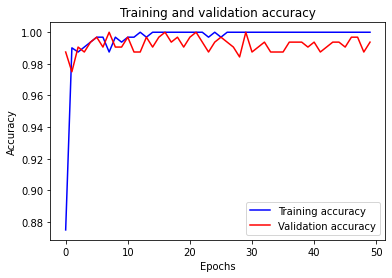

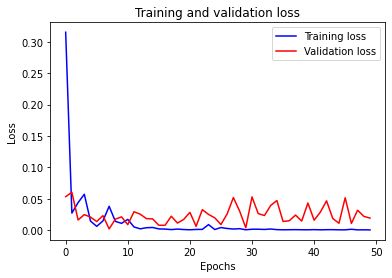


Check the predictions on the validation dataset : 


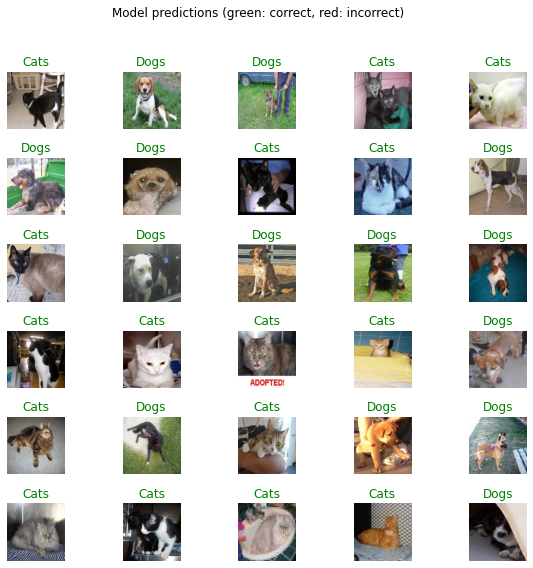

In [ ]:
#RESNET V2 101 AS FEATURE EXTRACTOR

#Resnet v2 101 model as feature extractor and train the model
#feature extractor url for Resnet v2 101
resnetv2_101_feature_extractor_url = "https://tfhub.dev/google/imagenet/resnet_v2_101/feature_vector/4"

#create the model with features extracted from the pre-trained Resnet v2 101 model and extra classifier layer added which is only trained
resnetv2_101_model = createTransferLearningModel(resnetv2_101_feature_extractor_url,image_shape,image_data)

#Compile the model generated above
resnetv2_101_history = compileTrainTLModel(resnetv2_101_model,opt,epochs,image_data,validation_data)

#Plot the loss and accuracy for the training dataset
print("\nPlot the loss and accuracy for the training dataset : ")
plot_accuracy_loss(resnetv2_101_history)

#Predict the validation dataset images
print("\nCheck the predictions on the validation dataset : ")
modelPredictions(class_names,validation_batch,resnetv2_101_model,validation_label_batch)

**Result Summary**

**Transfer Learning**

- Using the Transfer Learning we can use the pretrained models and use them as feature extractor layer.
- We can get the trained layers from the model and remove the top layer and add classifier layer and only train the parameters for the classifier layer. 
- We can see that for such small dataset of Cats and Dogs we get a very high accuracy without much effort.

Models used
1. MobileNet
2. Resnet V2 50
3. Resnet V2 101

**Comparison of Results**

**1. Mobilenet Vs  basic CNN model built without transfer learning**
- We can see that the accuracy we get using Mobilenet is very high as compared to the basic CNN model built earlier with the Data Augmentation and fine tunning.

- Without any effort we get the accuracy 
  
  MobileNet - 98% with 50 epochs

  CNN model with Data Augmentation - 80% with 50 epochs 
- The time taken to train the basic CNN model with Data augmentation is more compared to the Mobilenet, as in Mobilenet we use the already trained dataset.


**2. Mobilenet Vs Resnet V2 50 & Resnet V2 101** 
- With all these feature extractor models we can see that without much effort we get a very high accuracy as these are pre-trained.
- Resnet v2 50 and Resnet 101 have better performance than the Mobilenet.
- We can see for Resnet the accuracy for training and validation dataset is 100% for the training and 99% for the validation dataset for 50 epochs. While for Mobilenet we can see its 98% and can increase if trained for more epochs.
- The time taken by Resnet is slightly higher than the Mobilenet.



